In [34]:
#UNIVARIATE ANALYSIS

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scipy.stats as stats

In [36]:
data=pd.read_csv('C:/Users/sanks/Sahyadri/Internships/Internship-II/DATASETS/fake_bills.csv')

In [37]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [39]:
quant=0
quali=0
nom=0
cat=0
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        quant+= 1
    else:  # Non-numeric data types
        quali += 1
        unique_values = len(data[column].unique())
        if unique_values>2:
            nom+= 1
        else:
            cat+= 1

In [40]:
print(f"Quantitative:{quant}")
print(f"Quanlitative:{quali}")
print(f"Nominal:{nom}")
print(f"Categorical:{cat}")

Quantitative:6
Quanlitative:1
Nominal:0
Categorical:1


In [41]:
print('Display the descriptive statics')
all_stats = data.describe(include='all')
print(all_stats)

Display the descriptive statics
       is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique     

In [42]:
print('Check for duplicate values')
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Check for duplicate values
Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []


In [43]:
print('Know the unique values in particular column')
unique_values = data['is_genuine'].unique()
print("Unique values in 'Name':")
print(unique_values)


Know the unique values in particular column
Unique values in 'Name':
[ True False]


In [44]:
df=data.dropna(axis=0) #To drop missing or null values
print(df)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

In [45]:
data_no_duplicates = data.drop_duplicates()
print("Dataset without duplicates:")
print(data_no_duplicates)


Dataset without duplicates:
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      lengt

In [46]:
# Know data types of all attribute
print('Know data types of all attribute')
column_data_types = data_no_duplicates.dtypes

print("Data Types of All Attributes:")
print(column_data_types)

Know data types of all attribute
Data Types of All Attributes:
is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [47]:
#PROJECT TASK-1

In [48]:
#FIRST 10 ROWS
data_no_duplicates.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [49]:
#Last 10 rows
data_no_duplicates.tail(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1490,False,171.82,104.32,104.05,6.06,3.03,111.68
1491,False,171.79,104.18,104.54,5.13,3.51,112.40
1492,False,172.01,103.97,104.40,5.52,3.31,111.18
1493,False,171.63,104.33,104.61,4.88,3.35,112.16
1494,False,171.57,104.14,104.14,5.41,3.23,111.76
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [50]:
#Number of rows and columns
data_no_duplicates.shape

(1500, 7)

In [51]:
#Data types
data_no_duplicates.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [52]:
data_no_duplicates.isnull()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1495,False,False,False,False,False,False,False
1496,False,False,False,False,False,False,False
1497,False,False,False,False,False,False,False
1498,False,False,False,False,False,False,False


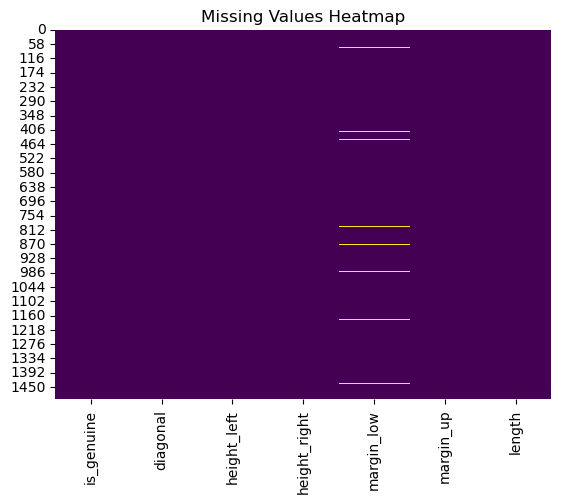

In [53]:
sns.heatmap(data_no_duplicates.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [54]:
#To handle the null values
data.dropna()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [55]:
#Fill the missing values
df_filled = data.fillna(df.mean())
print(df_filled)

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

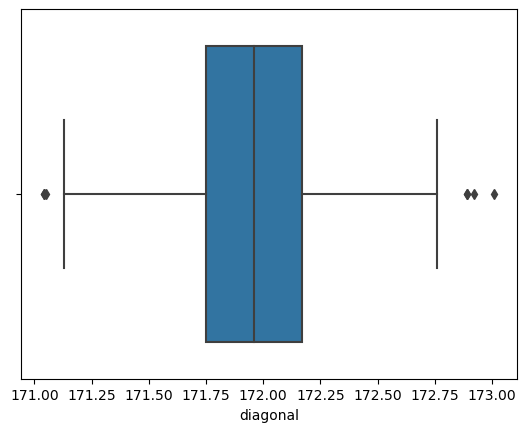

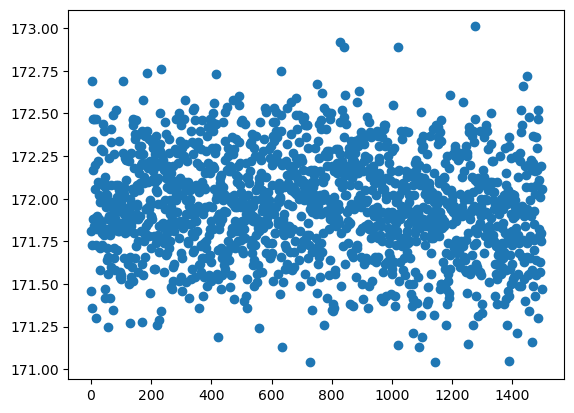

In [56]:
#Outliers
sns.boxplot(x=df_filled['diagonal'])
plt.show()

# Scatter plot to visualize outliers
plt.scatter(df_filled.index, df_filled['diagonal'])
plt.show()

In [57]:
z_scores = np.abs(stats.zscore(df_filled['diagonal']))

# Define a threshold for considering outliers
threshold = 2  # You can adjust this threshold as needed

# Remove outliers based on the threshold
data_no_outliers = [x for x, z in zip(df_filled['diagonal'], z_scores) if z < threshold]

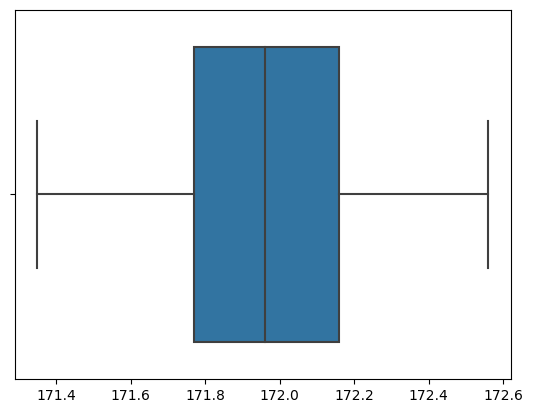

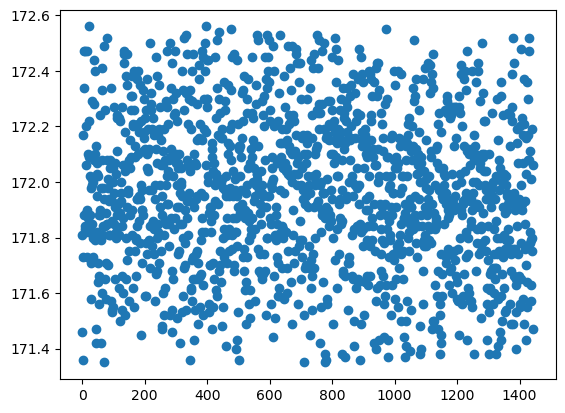

In [58]:
sns.boxplot(x=data_no_outliers)
plt.show()

# Scatter plot to visualize outliers
plt.scatter(range(len(data_no_outliers)), data_no_outliers, label='Data Points')
plt.show()

In [59]:
label_encoder = LabelEncoder()
print(label_encoder.fit_transform(df_filled['is_genuine']))

[1 1 1 ... 0 0 0]


In [60]:
df_filled

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


Diagonal


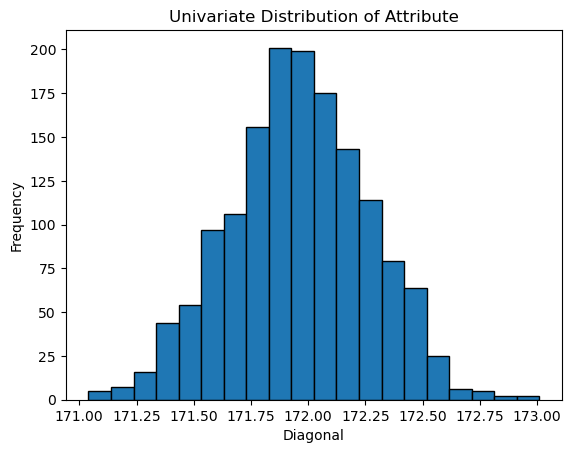

height_left


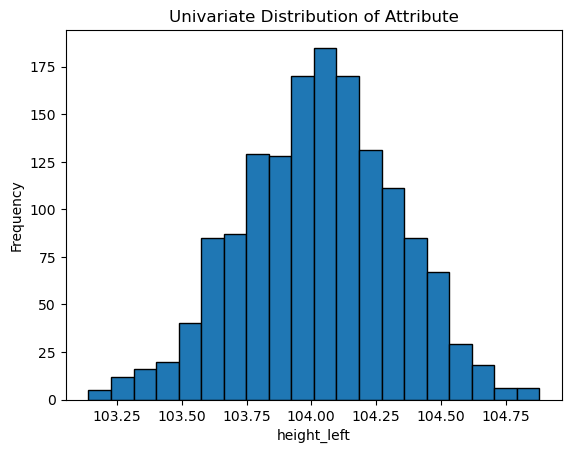

height_right


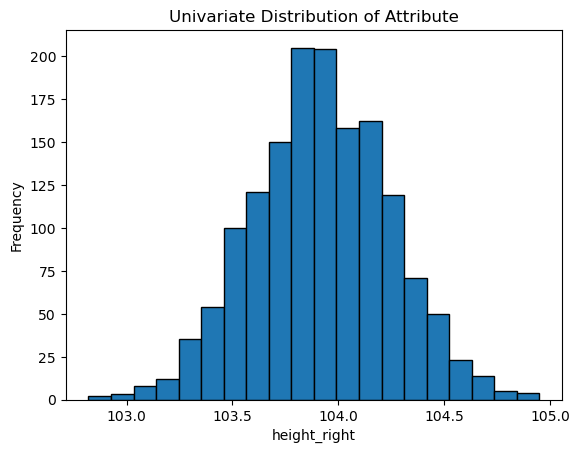

margin_low


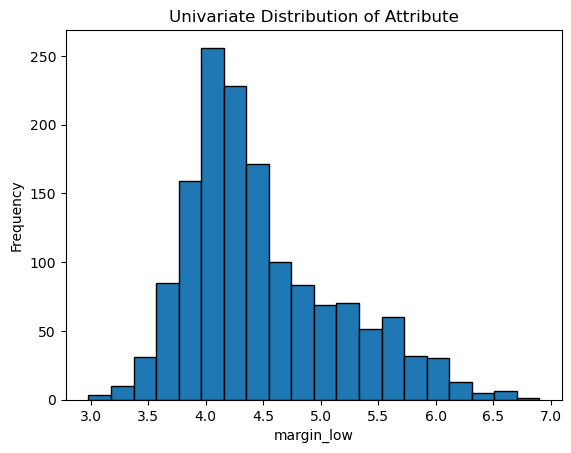

margin_up


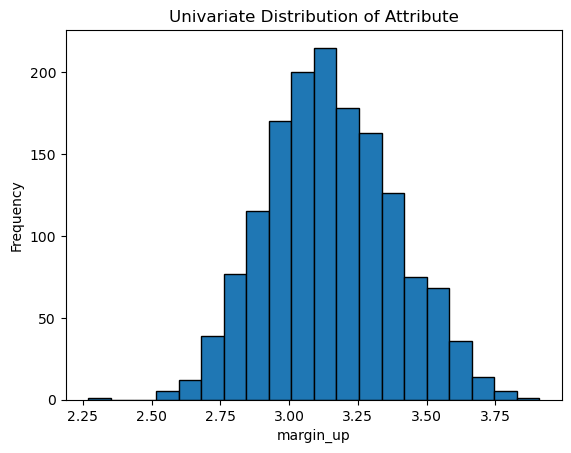

length


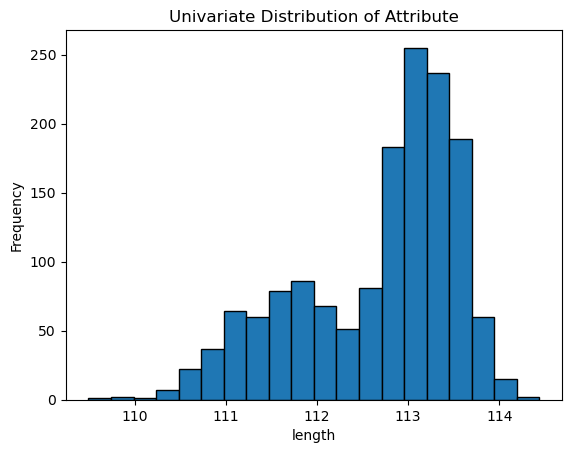

In [61]:
print('Diagonal')
attribute_values = data['diagonal']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Diagonal')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()
print('height_left')
attribute_values = data['height_left']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('height_left')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()
print('height_right')
attribute_values = data['height_right']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('height_right')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()
print('margin_low')
attribute_values = data['margin_low']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('margin_low')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()
print('margin_up')
attribute_values = data['margin_up']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('margin_up')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()
print('length')
attribute_values = data['length']
plt.hist(attribute_values, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('length')
plt.ylabel('Frequency')
plt.title('Univariate Distribution of Attribute')
plt.show()

In [62]:
df_filled.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.655569,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.030000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.330000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.860000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [63]:
for column in df_filled.columns:
    value_counts = df_filled[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for is_genuine:
True     1000
False     500
Name: is_genuine, dtype: int64

Value counts for diagonal:
171.99    28
171.91    26
171.94    25
171.95    24
172.02    24
          ..
172.60     1
171.28     1
172.54     1
171.25     1
171.16     1
Name: diagonal, Length: 159, dtype: int64

Value counts for height_left:
103.95    30
104.05    27
104.18    27
103.99    25
104.17    25
          ..
103.36     1
103.30     1
103.46     1
103.41     1
104.85     1
Name: height_left, Length: 155, dtype: int64

Value counts for height_right:
103.76    28
103.83    24
103.94    24
103.80    24
103.85    23
          ..
103.08     1
103.24     1
103.16     1
103.04     1
104.61     1
Name: height_right, Length: 170, dtype: int64

Value counts for margin_low:
4.485967    37
4.080000    20
4.100000    20
4.180000    20
4.170000    18
            ..
5.350000     1
6.110000     1
5.700000     1
5.740000     1
5.410000     1
Name: margin_low, Length: 286, dtype: int64

Value counts for ma

In [64]:
for column in df_filled.columns:
    print(f"{column}:{len(df_filled[column].unique())}\n")
    

is_genuine:2

diagonal:159

height_left:155

height_right:170

margin_low:286

margin_up:123

length:336



In [65]:
df_filled

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [66]:
df_filled.to_csv('C:/Users/sanks/Sahyadri/Internships/Internship-II/DATASETS/FAKEBILL_Day1.csv', index=False)